In [1]:
import os
import sys
import time
import scipy.io as sio
import scipy.sparse as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp

%matplotlib inline

import re
numeric_const_pattern = r"""
     [-+]? 
     (?:
         (?: \d* \. \d+ )
         |
         (?: \d+ \.? )
     )
     (?: [Ee] [+-]? \d+ ) ?
     """
rx = re.compile(numeric_const_pattern, re.VERBOSE)

from IPython.display import clear_output

# Minimum Weight Connected Dominating Set (MWCDS) results

In [16]:
mwcds_csv_dict = {
    "BA":'./output/result_GCNCDS_deep_ld1_c32_l5_cheb1_diver2_mpy_dpg_policy_BA_Graph_Uniform_GEN21_test1_test_foo.csv',
    "GRP":'./output/result_GCNCDS_deep_ld1_c32_l5_cheb1_diver2_mpy_dpg_policy_GRP_Graph_Uniform_GEN21_test1_test_foo.csv',
    "ER":'./output/result_GCNCDS_deep_ld1_c32_l5_cheb1_diver2_mpy_dpg_policy_ER_Graph_Uniform_GEN21_test1_test_foo.csv',
    "WS":'./output/result_GCNCDS_deep_ld1_c32_l5_cheb1_diver2_mpy_dpg_policy_WS_Graph_Uniform_GEN21_test1_test_foo.csv',
                   }

df_mwcds = pd.DataFrame([])
for key in mwcds_csv_dict:
    mwcds_csv = mwcds_csv_dict[key]
    try:
        df_tmp = pd.read_csv(mwcds_csv, index_col=0)
        df_tmp['m'] = df_tmp['p']*df_tmp['k']
        df_tmp['m'] = df_tmp['m'].apply(np.round)
        df_tmp['type']=key
        df_mwcds = pd.concat([df_mwcds, df_tmp], axis=0, ignore_index=True)
    except:
        pass
df_mwcds

,type,size,k,p,mwds,mwcds,gcn,greedy,ratio,ar_db,ar_gb,mwcds_0,mwcds_i,mwds_0,mwds_i,vvv,m
0,BA,200,12,0.281997,NaN,NaN,390.119308,338.092124,1.153885,2.550138,2.942565,107.0,118.0,69.0,73.0,132.577984,3.0
1,BA,250,11,0.276555,NaN,NaN,596.469000,573.550106,1.039960,2.781050,2.892180,141.0,145.0,87.0,93.0,206.235064,3.0
2,BA,150,15,0.166337,NaN,NaN,417.623101,372.809994,1.120204,2.296407,2.572444,96.0,102.0,63.0,71.0,162.344902,2.0
3,BA,150,21,0.292982,NaN,NaN,218.117986,211.683527,1.030397,4.072156,4.195936,62.0,64.0,42.0,43.0,51.983155,6.0
4,BA,300,10,0.304991,NaN,NaN,693.979717,590.379322,1.175481,3.227548,3.793921,164.0,181.0,108.0,121.0,182.918842,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,WS,100,21,0.336340,NaN,NaN,28.977632,35.434344,0.817784,3.746417,3.063759,19.0,21.0,12.0,19.0,9.458195,7.0
7995,WS,200,24,0.190733,NaN,NaN,43.788411,44.028235,0.994553,2.619434,2.605166,30.0,41.0,18.0,41.0,16.808301,5.0
7996,WS,100,27,0.232670,NaN,NaN,43.076832,39.307392,1.095896,2.525741,2.767950,15.0,17.0,10.0,12.0,15.562719,6.0
7997,WS,150,24,0.183372,NaN,NaN,38.111246,54.656172,0.697291,2.931486,2.044098,26.0,27.0,14.0,25.0,18.644530,4.0


In [17]:
df_mwcds.groupby(['type']).mean()

,size,k,p,mwds,mwcds,gcn,greedy,ratio,ar_db,ar_gb,mwcds_0,mwcds_i,mwds_0,mwds_i,vvv,m
type,,,,,,,,,,,,,,,,
BA,225.350000,19.59750,0.250471,NaN,NaN,338.655710,344.825357,0.960508,3.513142,3.308604,99.871000,97.2040,65.245500,64.405000,103.060581,4.893000
ER,226.538269,19.29965,0.251120,NaN,NaN,105.870887,124.065012,0.840088,3.122040,2.531223,53.451726,53.4002,34.144072,43.469735,43.026415,4.848924
GRP,225.675000,19.53200,0.252236,NaN,NaN,64.612016,79.894380,0.827460,3.513383,2.823001,38.965000,44.3905,25.427000,41.031500,24.013723,4.899500
WS,224.625000,19.65800,0.249385,NaN,NaN,82.251777,90.936149,0.934257,2.589077,2.348184,45.057500,50.6340,27.530000,43.666000,39.282312,4.910000


In [18]:
df1 = df_mwcds.copy()
df2 = df_mwcds.copy()
# df1['algo'] = 'GCNN(5)+Dist.Greedy, ' + df1['type']
df1['Solver'] = 'GCNN(5)+Dist.Greedy'
df1['ar'] = df1['ar_gb']
# df2['algo'] = 'Dist.Greedy, ' + df2['type']
df2['Solver'] = 'Dist.Greedy'
df2['ar'] = df2['ar_db']
df_cds = pd.concat([df1,df2], ignore_index=True)
df_cds['Graph']=df_cds['type']
df_cds

,type,size,k,p,mwds,mwcds,gcn,greedy,ratio,ar_db,ar_gb,mwcds_0,mwcds_i,mwds_0,mwds_i,vvv,m,Solver,ar,Graph
0,BA,200,12,0.281997,NaN,NaN,390.119308,338.092124,1.153885,2.550138,2.942565,107.0,118.0,69.0,73.0,132.577984,3.0,GCNN(5)+Dist.Greedy,2.942565,BA
1,BA,250,11,0.276555,NaN,NaN,596.469000,573.550106,1.039960,2.781050,2.892180,141.0,145.0,87.0,93.0,206.235064,3.0,GCNN(5)+Dist.Greedy,2.892180,BA
2,BA,150,15,0.166337,NaN,NaN,417.623101,372.809994,1.120204,2.296407,2.572444,96.0,102.0,63.0,71.0,162.344902,2.0,GCNN(5)+Dist.Greedy,2.572444,BA
3,BA,150,21,0.292982,NaN,NaN,218.117986,211.683527,1.030397,4.072156,4.195936,62.0,64.0,42.0,43.0,51.983155,6.0,GCNN(5)+Dist.Greedy,4.195936,BA
4,BA,300,10,0.304991,NaN,NaN,693.979717,590.379322,1.175481,3.227548,3.793921,164.0,181.0,108.0,121.0,182.918842,3.0,GCNN(5)+Dist.Greedy,3.793921,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15993,WS,100,21,0.336340,NaN,NaN,28.977632,35.434344,0.817784,3.746417,3.063759,19.0,21.0,12.0,19.0,9.458195,7.0,Dist.Greedy,3.746417,WS
15994,WS,200,24,0.190733,NaN,NaN,43.788411,44.028235,0.994553,2.619434,2.605166,30.0,41.0,18.0,41.0,16.808301,5.0,Dist.Greedy,2.619434,WS
15995,WS,100,27,0.232670,NaN,NaN,43.076832,39.307392,1.095896,2.525741,2.767950,15.0,17.0,10.0,12.0,15.562719,6.0,Dist.Greedy,2.525741,WS
15996,WS,150,24,0.183372,NaN,NaN,38.111246,54.656172,0.697291,2.931486,2.044098,26.0,27.0,14.0,25.0,18.644530,4.0,Dist.Greedy,2.931486,WS


In [19]:
def add_patch(legend):
    from matplotlib.patches import Patch
    ax = legend.axes

    handles, labels = ax.get_legend_handles_labels()
    handles.append(Patch(facecolor='white', edgecolor='white', alpha=0.1))
    labels.append(" ")

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())




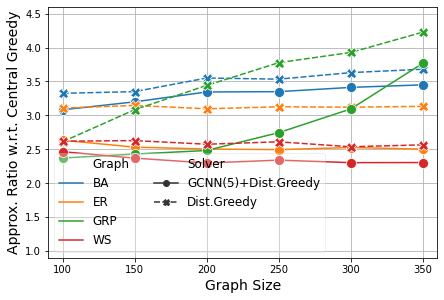

In [20]:
fig, ax = plt.subplots(1,1,figsize=(8, 6))

sns.lineplot(data=df_cds, x='size', y='ar', hue='Graph', style='Solver', 
             hue_order=['BA','ER','GRP','WS'],
             style_order=['GCNN(5)+Dist.Greedy','Dist.Greedy'],
             markers=True, ci=None, markersize=10, 
             ax=ax, legend='full')
ax.grid(True)
ax.set_ylim([0.9, 4.6])
ax.set_xlim([90, 360])
lgd = ax.legend(fontsize=12, framealpha=0.3, ncol=2, loc='lower left')
add_patch(lgd)
ax.set_xlabel("Graph Size", fontsize=14)
ax.set_ylabel("Approx. Ratio w.r.t. Central Greedy", fontsize=14)
fig.set_size_inches(6, 4)
fname='./output/mwcds_ap_to_cgreedy_grp.pdf'
# pp = PdfPages(fname)
plt.tight_layout(pad=0.1)
fig.savefig(fname,
            dpi=300, #facecolor='w', edgecolor='w',
            orientation='portrait',
            format='pdf')
# fig.savefig(fname.replace('.pdf','.png'),
#             dpi=300, #facecolor='w', edgecolor='w',
#             orientation='portrait',
#             format='png')


# Node Weighted Steiner Tree (NWST) results

In [21]:

steiner_csv_dict = {
    "BA":'./output/result_GCNSteinerGRP_deep_ld1_c32_l5_cheb1_diver1_mpy_dpg_policy_BA_Graph_Uniform_GEN21_test1_test_foo.csv',
    "GRP":'./output/result_GCNSteinerGRP_deep_ld1_c32_l5_cheb1_diver1_mpy_dpg_policy_GRP_Graph_Uniform_GEN21_test1_test_foo.csv',
    "ER":'./output/result_GCNSteinerGRP_deep_ld1_c32_l5_cheb1_diver1_mpy_dpg_policy_ER_Graph_Uniform_GEN21_test1_test_foo.csv',
    "WS":'./output/result_GCNSteinerGRP_deep_ld1_c32_l5_cheb1_diver1_mpy_dpg_policy_WS_Graph_Uniform_GEN21_test1_test_foo.csv',
                   }

df_s = pd.DataFrame([])
for key in steiner_csv_dict:
    steiner_csv = steiner_csv_dict[key]
    try:
        df_tmp = pd.read_csv(steiner_csv, index_col=0)
        df_tmp['m'] = df_tmp['p']*df_tmp['k']
        df_tmp['m'] = df_tmp['m'].apply(np.round)
        df_tmp['type']=key
        df_s = pd.concat([df_s, df_tmp], axis=0, ignore_index=True)
    except:
        pass
df_s

,type,size,k,p,mwds,mwcds,gcn,greedy,ratio,steiner_0,steiner_i,m
0,BA,200,14,0.244142,NaN,NaN,80.241424,82.631852,0.971071,26.0,25.0,3.0
1,BA,150,17,0.177841,NaN,NaN,68.674708,66.902516,1.026489,25.0,25.0,3.0
2,BA,250,24,0.283682,NaN,NaN,34.688483,38.763846,0.894867,25.0,22.0,7.0
3,BA,250,25,0.217516,NaN,NaN,55.979795,55.979795,1.000000,29.0,29.0,5.0
4,BA,250,13,0.173938,NaN,NaN,106.545693,106.026600,1.004896,29.0,29.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7992,WS,300,11,0.240148,NaN,NaN,39.394060,44.371841,0.887817,39.0,36.0,3.0
7993,WS,250,13,0.176249,NaN,NaN,29.641437,29.497725,1.004872,26.0,26.0,2.0
7994,WS,300,10,0.331071,NaN,NaN,33.071880,35.291784,0.937099,30.0,27.0,3.0
7995,WS,100,16,0.312400,NaN,NaN,8.018567,8.018567,1.000000,8.0,8.0,5.0


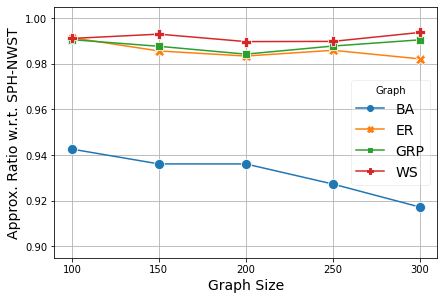

In [22]:
fig, ax = plt.subplots(1,1,figsize=(8, 6))

# sns.lineplot(data=df_ds, x='size', y='ratio', hue='type', style='type', marker='x', ax=ax, mec='orange', mfc="None", mew=2)
sns.lineplot(data=df_s, x='size', y='ratio', hue='type', style='type', 
             hue_order=['BA','ER','GRP','WS'],
             style_order=['BA','ER','GRP','WS'],
             markers=True, markersize=10, dashes=False,
             ci=None, 
             ax=ax)
# sns.lineplot(data=df_ds_mis, x='size', y='ratio', hue='type', style='type', markers=True, ax=ax)
# sns.lineplot(data=df_ds, x='k', y='ratio', marker='+', ax=axs[1], mec='orange', mfc="None", mew=2)
ax.grid(True)
ax.set_xticks([100, 150, 200, 250, 300])
ax.set_yticks(np.arange(0.8, 1.01,0.02))
# ax.set_ylim([0.795, 1.005])
ax.set_ylim([0.895, 1.005])
# ax.legend(['Barabási–Albert'], fontsize=14)
# ax.legend(['Barabási–Albert','Erdős–Rényi','Gaussian Random Partition','Connected Watts-Strogatz small-world'], 
#           fontsize=14, framealpha=0.3, loc='lower left', title='Graph')
ax.legend(fontsize=14, framealpha=0.3, loc='center right', title='Graph')
ax.set_xlabel("Graph Size", fontsize=14)
ax.set_ylabel("Approx. Ratio w.r.t. SPH-NWST", fontsize=14)
fig.set_size_inches(6, 4)
fname='./output/nwst_ap_to_greedy.pdf'
# pp = PdfPages(fname)
plt.tight_layout(pad=0.1)
fig.savefig(fname,
            dpi=300, #facecolor='w', edgecolor='w',
            orientation='portrait',
            format='pdf')

In [23]:
# df_s['ratio'].describe()
df_s.groupby(['type']).mean()

,size,k,p,mwds,mwcds,gcn,greedy,ratio,steiner_0,steiner_i,m
type,,,,,,,,,,,
BA,200.375000,19.625500,0.251237,NaN,NaN,54.503894,59.898244,0.931752,26.720000,24.360000,4.940500
ER,200.625626,19.621121,0.251770,NaN,NaN,13.381993,13.636023,0.985733,14.274775,13.942943,4.943944
GRP,201.400700,19.611806,0.248960,NaN,NaN,8.241029,8.355667,0.988147,11.247124,11.037519,4.869935
WS,201.050000,19.684000,0.251287,NaN,NaN,12.292748,12.433117,0.991442,13.430500,13.214500,4.928000


# Minimum Weight Dominating Set (MWDS) results

In [24]:
mwds_csv_dict = {
    "BA":'./output/result_GCNDSGDYER_deep_ld1_c32_l5_cheb1_diver1_mpy_dpg_policy_BA_Graph_Uniform_GEN21_test1_test_foo.csv',
    "GRP":'./output/result_GCNDSGDYER_deep_ld1_c32_l5_cheb1_diver1_mpy_dpg_policy_GRP_Graph_Uniform_GEN21_test1_test_foo.csv',
    "ER":'./output/result_GCNDSGDYER_deep_ld1_c32_l5_cheb1_diver1_mpy_dpg_policy_ER_Graph_Uniform_GEN21_test1_test_foo.csv',
    "WS":'./output/result_GCNDSGDYER_deep_ld1_c32_l5_cheb1_diver1_mpy_dpg_policy_WS_Graph_Uniform_GEN21_test1_test_foo.csv',
                   }

df_ds = pd.DataFrame([])
for key in mwds_csv_dict:
    mwds_csv = mwds_csv_dict[key]
    try:
        df_tmp = pd.read_csv(mwds_csv, index_col=0)
        df_tmp['m'] = df_tmp['p']*df_tmp['k']
        df_tmp['m'] = df_tmp['m'].apply(np.round)
        df_tmp['type']=key
        df_ds = pd.concat([df_ds, df_tmp], axis=0, ignore_index=True)
    except:
        pass
df_ds['Graph'] = df_ds['type']
df_ds

,type,size,k,p,mwds,mwcds,gcn,greedy,ratio,ar_db,ar_gb,mwds_0,mwds_i,vvv,m,Graph
0,BA,450,17,0.225536,NaN,NaN,19.073828,24.208473,0.787899,0.368194,0.290099,104.0,74.0,65.749313,4.0,BA
1,BA,400,21,0.191822,NaN,NaN,15.095521,17.346281,0.870245,0.435257,0.378781,89.0,65.0,39.852931,4.0,BA
2,BA,100,18,0.339625,NaN,NaN,1.323201,1.478952,0.894688,0.691635,0.618798,14.0,12.0,2.138340,6.0,BA
3,BA,350,18,0.284438,NaN,NaN,11.393639,13.049409,0.873115,0.659495,0.575815,64.0,48.0,19.786972,5.0,BA
4,BA,200,22,0.262928,NaN,NaN,6.225239,8.030720,0.775178,0.739760,0.573446,44.0,31.0,10.855845,6.0,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,WS,400,25,0.332019,NaN,NaN,8.231799,8.231799,1.000000,0.695276,0.695276,42.0,42.0,11.839622,8.0,WS
7996,WS,100,21,0.227316,NaN,NaN,2.847273,2.847273,1.000000,2.026977,2.026977,11.0,11.0,1.404689,5.0,WS
7997,WS,200,13,0.188245,NaN,NaN,6.442328,7.803584,0.825560,0.840439,0.693833,30.0,27.0,9.285125,2.0,WS
7998,WS,400,27,0.314959,NaN,NaN,9.219092,9.134770,1.009231,0.885203,0.893374,39.0,39.0,10.319408,9.0,WS


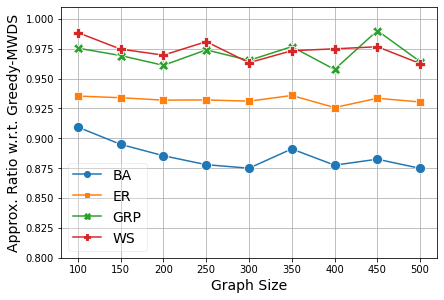

In [25]:
fig, ax = plt.subplots(1,1,figsize=(8, 6))

# sns.lineplot(data=df_ds, x='size', y='ratio', hue='type', style='type', marker='x', ax=ax, mec='orange', mfc="None", mew=2)
sns.lineplot(data=df_ds, x='size', y='ratio', hue='Graph', style='Graph', 
             hue_order=['BA','ER','GRP','WS'],
             markers=True, ci=None, markersize=10, dashes=False,
             ax=ax)
# sns.lineplot(data=df_ds_mis, x='size', y='ratio', hue='type', style='type', markers=True, ax=ax)
# sns.lineplot(data=df_ds, x='k', y='ratio', marker='+', ax=axs[1], mec='orange', mfc="None", mew=2)
ax.grid(True)
ax.set_ylim([0.8, 1.01])
# ax.legend(['Erdős–Rényi','Barabási–Albert','Gaussian Random Partition','Connected Watts-Strogatz small-world'], 
#           fontsize=14, framealpha=0.3)
ax.legend(fontsize=14, framealpha=0.3)
ax.set_xlabel("Graph Size", fontsize=14)
ax.set_ylabel("Approx. Ratio w.r.t. Greedy-MWDS", fontsize=14)
fig.set_size_inches(6, 4)
fname='./output/mwds_ap_to_greedy.pdf'
# pp = PdfPages(fname)
plt.tight_layout(pad=0.1)
fig.savefig(fname,
            dpi=300, #facecolor='w', edgecolor='w',
            orientation='portrait',
            format='pdf')

In [26]:
df_ds.groupby(['type']).mean()

,size,k,p,mwds,mwcds,gcn,greedy,ratio,ar_db,ar_gb,mwds_0,mwds_i,vvv,m
type,,,,,,,,,,,,,,
BA,295.200,19.5645,0.247304,NaN,NaN,11.768128,13.264352,0.885844,0.467482,0.413254,62.7775,48.3635,30.670492,4.8360
ER,299.675,19.3450,0.250147,NaN,NaN,5.034774,5.419675,0.932210,0.392283,0.365746,46.2825,42.0390,18.001253,4.8330
GRP,296.200,19.5460,0.250015,NaN,NaN,6.369268,6.626925,0.970221,1.509280,1.449691,27.7030,27.0235,5.297211,4.8995
WS,297.850,19.5660,0.249930,NaN,NaN,8.429164,8.704170,0.973998,1.006594,0.974317,36.5475,35.8795,11.501232,4.8970


# Maximum Weight Independent Set (MWIS) results

## 1. Local Communication Complexity (MWIS)

In [28]:
mwis_csv = "./output/result_GCNTwinAlt_deep_ld1_c32_l3_cheb1_diver1_mwis_dqn_ER_Graph_Uniform_GEN21_test2_lgs_local_complexity.csv"
df_mwis = pd.read_csv(mwis_csv, index_col=0)
df_mwis

,data,p,step_lgs,step_gcn
0,ER_n100_p0.02_b0_uni.mat,1.002887,3,2
1,ER_n100_p0.02_b10_uni.mat,0.995925,2,2
2,ER_n100_p0.02_b11_uni.mat,0.991418,3,2
3,ER_n100_p0.02_b12_uni.mat,1.010330,2,2
4,ER_n100_p0.02_b13_uni.mat,0.981121,2,2
...,...,...,...,...
495,ER_n300_p0.067_b5_uni.mat,1.080286,4,5
496,ER_n300_p0.067_b6_uni.mat,1.018484,4,4
497,ER_n300_p0.067_b7_uni.mat,1.051308,4,4
498,ER_n300_p0.067_b8_uni.mat,1.013965,4,4


In [5]:

def extract_Np(filename):
    list_para = filename[0:-4].split('_')
    N_p = round(float(list_para[2][1:]) * float(list_para[1][1:]), 0)
    return N_p


def extract_N(filename):
    list_para = filename[0:-4].split('_')
    N = int(list_para[1][1:])
    return N

def convertDf(df):
    df1 = df.rename(columns={"file": 'data', "ratio": 'p'})
    return df1.set_index('data')



In [29]:
df_mwis['N_p'] = df_mwis['data'].apply(extract_Np)
df_mwis['N'] = df_mwis['data'].apply(extract_N)
df_mwis

,data,p,step_lgs,step_gcn,N_p,N
0,ER_n100_p0.02_b0_uni.mat,1.002887,3,2,2.0,100
1,ER_n100_p0.02_b10_uni.mat,0.995925,2,2,2.0,100
2,ER_n100_p0.02_b11_uni.mat,0.991418,3,2,2.0,100
3,ER_n100_p0.02_b12_uni.mat,1.010330,2,2,2.0,100
4,ER_n100_p0.02_b13_uni.mat,0.981121,2,2,2.0,100
...,...,...,...,...,...,...
495,ER_n300_p0.067_b5_uni.mat,1.080286,4,5,20.0,300
496,ER_n300_p0.067_b6_uni.mat,1.018484,4,4,20.0,300
497,ER_n300_p0.067_b7_uni.mat,1.051308,4,4,20.0,300
498,ER_n300_p0.067_b8_uni.mat,1.013965,4,4,20.0,300


In [30]:
df1 = df_mwis.copy()
df2 = df_mwis.copy()
# df1['algo'] = 'GCNN(5)+Dist.Greedy, ' + df1['type']
df1['Solver'] = 'GCNN(3)+LGS'
df1['step'] = df1['step_gcn']
# df2['algo'] = 'Dist.Greedy, ' + df2['type']
df2['Solver'] = 'Vanilla LGS'
df2['step'] = df2['step_lgs']
df_is = pd.concat([df1,df2], ignore_index=True)
df_is

,data,p,step_lgs,step_gcn,N_p,N,Solver,step
0,ER_n100_p0.02_b0_uni.mat,1.002887,3,2,2.0,100,GCNN(3)+LGS,2
1,ER_n100_p0.02_b10_uni.mat,0.995925,2,2,2.0,100,GCNN(3)+LGS,2
2,ER_n100_p0.02_b11_uni.mat,0.991418,3,2,2.0,100,GCNN(3)+LGS,2
3,ER_n100_p0.02_b12_uni.mat,1.010330,2,2,2.0,100,GCNN(3)+LGS,2
4,ER_n100_p0.02_b13_uni.mat,0.981121,2,2,2.0,100,GCNN(3)+LGS,2
...,...,...,...,...,...,...,...,...
995,ER_n300_p0.067_b5_uni.mat,1.080286,4,5,20.0,300,Vanilla LGS,4
996,ER_n300_p0.067_b6_uni.mat,1.018484,4,4,20.0,300,Vanilla LGS,4
997,ER_n300_p0.067_b7_uni.mat,1.051308,4,4,20.0,300,Vanilla LGS,4
998,ER_n300_p0.067_b8_uni.mat,1.013965,4,4,20.0,300,Vanilla LGS,4


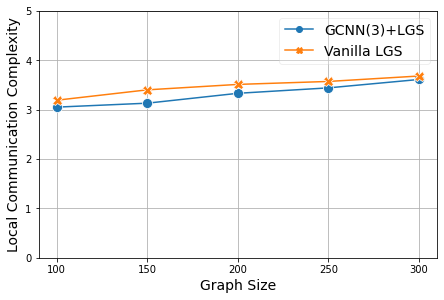

In [31]:
fig, ax = plt.subplots(1,1,figsize=(8, 6))

# sns.lineplot(data=df_ds, x='size', y='ratio', hue='type', style='type', marker='x', ax=ax, mec='orange', mfc="None", mew=2)
sns.lineplot(data=df_is, x='N', y='step', hue='Solver', style='Solver', 
             hue_order=['GCNN(3)+LGS','Vanilla LGS'],
             markers=True, ci=None, markersize=10, dashes=False,
             ax=ax)
# sns.lineplot(data=df_ds_mis, x='size', y='ratio', hue='type', style='type', markers=True, ax=ax)
# sns.lineplot(data=df_ds, x='k', y='ratio', marker='+', ax=axs[1], mec='orange', mfc="None", mew=2)
ax.grid(True)
ax.set_ylim([0, 5])
ax.set_xticks([100, 150, 200, 250, 300])
# ax.legend(['Erdős–Rényi','Barabási–Albert','Gaussian Random Partition','Connected Watts-Strogatz small-world'], 
#           fontsize=14, framealpha=0.3)
ax.legend(fontsize=14, framealpha=0.3)
ax.set_xlabel("Graph Size", fontsize=14)
ax.set_ylabel("Local Communication Complexity", fontsize=14)
fig.set_size_inches(6, 4)
fname='./output/mwis_local_complexity.pdf'
# pp = PdfPages(fname)
plt.tight_layout(pad=0.1)
fig.savefig(fname,
            dpi=300, #facecolor='w', edgecolor='w',
            orientation='portrait',
            format='pdf')

## 2. Approximation Ratios (MWIS)

In [10]:

files = [
    {
        'legend': "MP(Paschalidis15)",
        'file': 'mp_clique_greedy_ER_Graph_Uniform_GEN21_test2.csv',
        'dataset': 'ER_Graph_Uniform_GEN21_test2',
        'train': '',
        'test': 'ER'
    },
    {
        'legend': "MP(Paschalidis15)",
        'file': 'mp_clique_greedy_BA_Graph_Uniform_GEN21_test2.csv',
        'dataset': 'BA_Graph_Uniform_GEN21_test2',
        'train': '',
        'test': 'BA'
    },
    {
        'legend': 'IP(Gurobi)',
        'file': 'mlp_gurobi_BA_Graph_Uniform_GEN21_test2.csv',
        'dataset': 'BA_Graph_Uniform_GEN21_test2',
        'train': '',
        'test': 'BA'
    },
    {
        'legend': 'IP(Gurobi)',
        'file': 'mlp_gurobi_ER_Graph_Uniform_GEN21_test2.csv',
        'dataset': 'ER_Graph_Uniform_GEN21_test2',
        'train': '',
        'test': 'ER'
    },
    {
        'legend': 'GCNN(3)-LGS-adhoc,ER',
        'file': 'result_IS4SAT_deep_ld1_c32_l3_cheb1_diver1_mwis_dqn_ER_Graph_Uniform_GEN21_test2_lgs.csv',
        'dataset': 'ER_Graph_Uniform_GEN21_test2',
        'train': 'ER',
        'test': 'ER'
    },
    {
        'legend': 'GCNN(3)-LGS-adhoc,ER',
        'file': 'result_IS4SAT_deep_ld1_c32_l3_cheb1_diver1_mwis_dqn_BA_Graph_Uniform_GEN21_test2_lgs.csv',
        'dataset': 'BA_Graph_Uniform_GEN21_test2',
        'train': 'ER',
        'test': 'BA'
    },
    {
        'legend': 'GCNN(3)-LGS-Twin,ER',
        'file': 'result_GCNTwinAlt_deep_ld1_c32_l3_cheb1_diver1_mwis_dqn_ER_Graph_Uniform_GEN21_test2_lgs.csv',
        'dataset': 'ER_Graph_Uniform_GEN21_test2',
        'train': 'ER',
        'test': 'ER'
    },
    {
        'legend': 'GCNN(3)-LGS-ZOO,ER',
        'file': 'result_GCNZoo4_deep_ld1_c32_l3_cheb1_diver1_mwis_dqn_ER_Graph_Uniform_GEN21_test2_lgs.csv',
        'dataset': 'ER_Graph_Uniform_GEN21_test2',
        'train': 'ER',
        'test': 'ER'
    },
]



In [11]:
results = {}
data = pd.DataFrame()
for test in ['ER']:
    csvfile = 'mlp_gurobi_{}_Graph_Uniform_GEN21_test2.csv'.format(test)
    df0 = pd.read_csv(os.path.join('./output/', csvfile), index_col='data')
    key = 'LP'
    df0['LGS(Joo12)'] = 1 / df0['p']
    tmp = pd.DataFrame()
    tmp['approx_ratio'] = df0['LGS(Joo12)']
    tmp['Solver'] = 'LGS(Joo12)'
    tmp['test'] = test
    tmp.reset_index(inplace=True)
    tmp = tmp.rename(columns={"index": 'data'})
    data = data.append(tmp, ignore_index=True)
    for i in range(len(files)):
        fdict = files[i]
        if test != fdict['test']:
            continue
        csvfile = os.path.join('./output', fdict['file'])
        if not os.path.isfile(csvfile):
            continue
        df = pd.read_csv(csvfile, index_col=False)
        df = convertDf(df)
        tmp = pd.DataFrame()
        tmp['approx_ratio'] = df['p']*df0['LGS(Joo12)']
        tmp['Solver'] = fdict['legend']
        tmp['test'] = test
        tmp.reset_index(inplace=True)
        tmp = tmp.rename(columns={"index": 'data'})
        data = data.append(tmp, ignore_index=True)

data['N_p'] = data['data'].apply(extract_Np)
data['N'] = data['data'].apply(extract_N)


In [14]:

def plot_approx_by_size(data, lgddict={}):
    fontsize = 14
    plotList = [
        'GCNN(3)-LGS-adhoc,ER',
        'GCNN(3)-LGS-Twin,ER',
        'GCNN(3)-LGS-ZOO,ER',
        "MP(Paschalidis15)",
        'LGS(Joo12)',
        ]
    datap = pd.DataFrame()
    for sol in plotList:
        tmp = data.loc[data['Solver'] == sol]
        tmp = tmp.replace(to_replace=sol, value=sol.replace(',ER',''))
        datap = datap.append(tmp, ignore_index=True)
    datap = datap.replace(lgddict)

    ax = sns.lineplot(x="N", y="approx_ratio", hue="Solver", style='Solver', ci=None,
                      linewidth=2.0, markersize=10,
                      data=datap, palette="tab10", markers=True, dashes=True)
    for key, val in lgddict.items():
        datap['Solver'] = datap.Solver.str.replace(key, val, regex=False)
        plotList = [a.replace(key, val) for a in plotList]
    lgd = [a.replace(',ER','') for a in plotList]
    L = ax.legend(lgd, loc='best', ncol=1, fontsize=12,
                  fancybox=True, framealpha=0.3, columnspacing=1)

    ax.grid()
    ax.set_ylim([0.85, 1.005])
    # ax.set_yticks(np.arange(0.85, 1.005, 0.05))
    ax.set_xticks([100, 150, 200, 250, 300])
    ax.set_xlabel('Graph Size', fontsize=fontsize)
    ax.set_ylabel('Approx. Ratio w.r.t. Optimal')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontsize)
    fig = plt.gcf()
    fig.set_size_inches(6, 4)
    fname='./output/mwis_ap_to_optimal_twin.pdf'
    # pp = PdfPages(fname)
    plt.tight_layout(pad=0.1)
    fig.savefig(fname,
                dpi=300, #facecolor='w', edgecolor='w',
                orientation='portrait',
                format='pdf')
    fig.savefig(fname.replace('.pdf','.png'),
                dpi=300, #facecolor='w', edgecolor='w',
                orientation='portrait',
                format='png')
    plt.close()
    print(datap.groupby("Solver")["approx_ratio"].describe())


In [15]:
lgddict = {'LGS(Joo12)': 'LGS [Joo12]',
           'MP(Paschalidis15)': 'MP [Paschalidis15]',
           'GCNN(3)': 'GCNN(3)',
           }

plot_approx_by_size(data, lgddict)


                    count      mean       std       min       25%       50%  \
Solver                                                                        
GCNN(3)-LGS-Twin    500.0  0.931470  0.048066  0.617983  0.897709  0.941279   
GCNN(3)-LGS-ZOO     500.0  0.927229  0.046911  0.603689  0.902223  0.935571   
GCNN(3)-LGS-adhoc   500.0  0.931685  0.048746  0.604419  0.899529  0.938812   
LGS [Joo12]         500.0  0.897314  0.059907  0.608567  0.857902  0.899586   
MP [Paschalidis15]  500.0  0.906907  0.071173  0.603072  0.857545  0.900465   

                         75%  max  
Solver                             
GCNN(3)-LGS-Twin    0.972390  1.0  
GCNN(3)-LGS-ZOO     0.962904  1.0  
GCNN(3)-LGS-adhoc   0.971741  1.0  
LGS [Joo12]         0.945900  1.0  
MP [Paschalidis15]  0.982117  1.0  
